In [1]:
import pandas as pd
from sklearn import cluster, datasets
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('collection_of_songs.csv')

In [3]:
# Cluster the audio features of the collection of songs

In [4]:
df

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,A Design for Life - Remastered,Manic Street Preachers,0uJyE3M3ecGZgzltsQKs3a,52,0.184,0.8410,0.0,-4.723,1.0,0.0468,...,0.0422,0.349,88.224,audio_features,0uJyE3M3ecGZgzltsQKs3a,spotify:track:0uJyE3M3ecGZgzltsQKs3a,https://api.spotify.com/v1/tracks/0uJyE3M3ecGZ...,https://api.spotify.com/v1/audio-analysis/0uJy...,257640.0,4.0
1,Nature Boy,Nat King Cole,2WMyu5IYgxEuCd6xgFgJrl,58,0.275,0.0895,2.0,-19.755,0.0,0.0374,...,0.1080,0.111,104.144,audio_features,2WMyu5IYgxEuCd6xgFgJrl,spotify:track:2WMyu5IYgxEuCd6xgFgJrl,https://api.spotify.com/v1/tracks/2WMyu5IYgxEu...,https://api.spotify.com/v1/audio-analysis/2WMy...,173533.0,4.0
2,Bohemian Rhapsody - Remastered 2011,Queen,1AhDOtG9vPSOmsWgNW0BEY,0,0.414,0.4040,0.0,-9.928,0.0,0.0499,...,0.3000,0.224,71.105,audio_features,1AhDOtG9vPSOmsWgNW0BEY,spotify:track:1AhDOtG9vPSOmsWgNW0BEY,https://api.spotify.com/v1/tracks/1AhDOtG9vPSO...,https://api.spotify.com/v1/audio-analysis/1AhD...,354320.0,4.0
3,Tainted Love,Soft Cell,3HnqpxXpizCRADKCU78cLk,0,0.518,0.5100,0.0,-8.057,0.0,0.0352,...,0.2920,0.651,144.543,audio_features,3HnqpxXpizCRADKCU78cLk,spotify:track:3HnqpxXpizCRADKCU78cLk,https://api.spotify.com/v1/tracks/3HnqpxXpizCR...,https://api.spotify.com/v1/audio-analysis/3Hnq...,153880.0,4.0
4,Ode To Billie Joe,Bobbie Gentry,3ZsLNrysR0UFbjcaIEcDTj,10,0.595,0.1820,7.0,-11.078,1.0,0.0517,...,0.0847,0.642,117.352,audio_features,3ZsLNrysR0UFbjcaIEcDTj,spotify:track:3ZsLNrysR0UFbjcaIEcDTj,https://api.spotify.com/v1/tracks/3ZsLNrysR0UF...,https://api.spotify.com/v1/audio-analysis/3ZsL...,254600.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Charles Koechlin,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,...,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0
11478,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Gabriel Fauré,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,...,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0
11479,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Sarah Wegener,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,...,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0
11480,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Stuttgart Radio Symphony Orchestra,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,...,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0


In [5]:
# Getting just the audio features

X_audio = df.drop(['song_name','name','song_id', 'popularity', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)
X_audio

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.184,0.8410,0.0,-4.723,1.0,0.0468,0.000811,0.000045,0.0422,0.349,88.224
1,0.275,0.0895,2.0,-19.755,0.0,0.0374,0.971000,0.022100,0.1080,0.111,104.144
2,0.414,0.4040,0.0,-9.928,0.0,0.0499,0.271000,0.000000,0.3000,0.224,71.105
3,0.518,0.5100,0.0,-8.057,0.0,0.0352,0.476000,0.000000,0.2920,0.651,144.543
4,0.595,0.1820,7.0,-11.078,1.0,0.0517,0.786000,0.000000,0.0847,0.642,117.352
...,...,...,...,...,...,...,...,...,...,...,...
11477,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000
11478,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000
11479,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000
11480,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000


In [20]:
# Scale the audio features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_audio_scaled = scaler.fit_transform(X_audio)
pd.DataFrame(X_audio_scaled,columns=X_audio.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-2.256376,0.914590,-1.454607,1.071463,0.613118,-0.259789,-0.999412,-0.388718,-0.971061,-0.929043,-1.210799
1,-1.685600,-2.218282,-0.894012,-2.433427,-1.631007,-0.400947,1.931563,-0.292295,-0.569719,-1.867259,-0.646364
2,-0.813757,-0.907186,-1.454607,-0.142145,-1.631007,-0.213236,-0.183162,-0.388913,0.601372,-1.421803,-1.817744
3,-0.161442,-0.465291,-1.454607,0.294101,-1.631007,-0.433984,0.436150,-0.388913,0.552576,0.261465,0.785961
4,0.321522,-1.832665,0.507474,-0.410281,0.613118,-0.186206,1.372671,-0.388913,-0.711835,0.225987,-0.178081


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

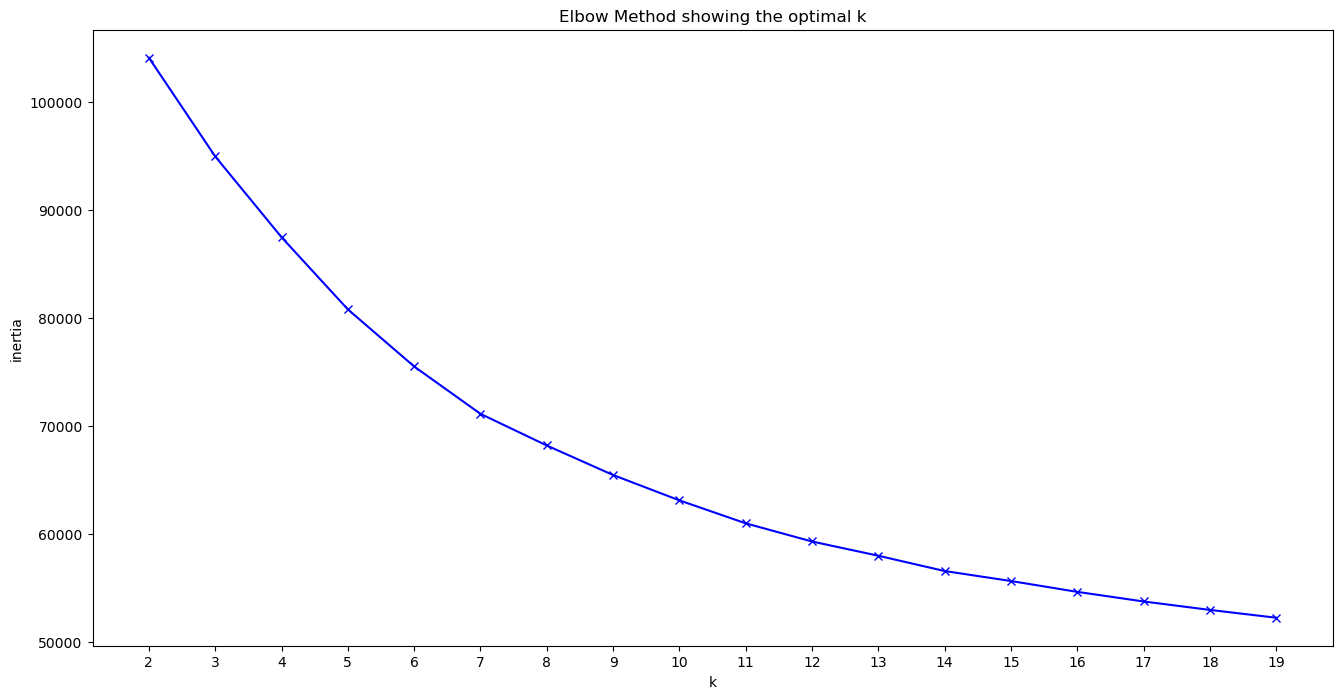

In [7]:
# Choosing k

import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, 
                    n_init=10) # to avoid a warning message
    kmeans.fit(X_audio_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [8]:
# There is no significant elbow point.  

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

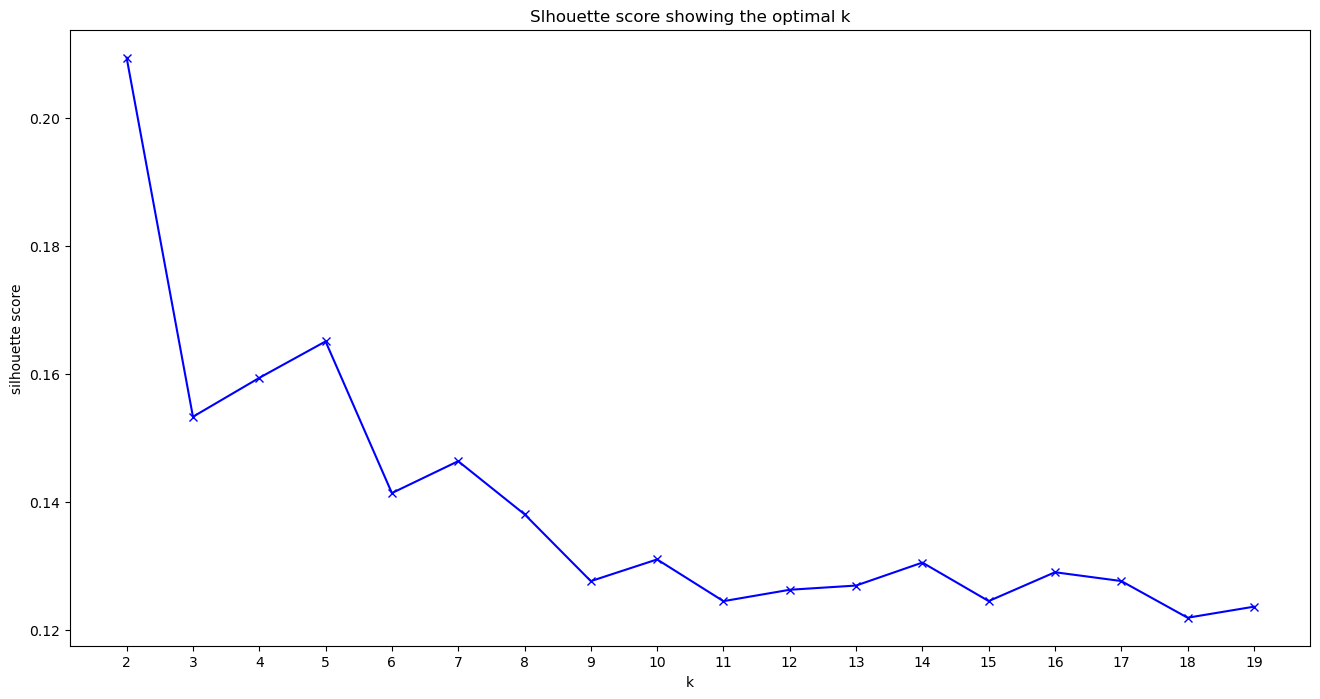

In [9]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    n_init=10) # to avoid a warning message
    kmeans.fit(X_audio_scaled)
    silhouette.append(silhouette_score(X_audio_scaled, kmeans.predict(X_audio_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [10]:
# 2 clusters are a bit small, so I would rather take 5 as the second highest silhouette score.

In [11]:
# Now we can actually create the cluster

#Fit the clusters

kmeans = KMeans(n_clusters=5, random_state=1234, n_init= 10)
kmeans.fit(X_audio_scaled)

KMeans(n_clusters=5, n_init=10, random_state=1234)

In [12]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_audio_scaled)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2613
1    2334
2    5326
3     524
4     685
Name: count, dtype: int64

In [13]:
kmeans.inertia_ 

80809.81494752943

In [14]:
clusters

array([2, 0, 0, ..., 4, 4, 4])

In [15]:
#Now we want to append the clusters to our dataframe and drop all the audio feature columns.
df['audio_clusters'] = clusters

In [16]:
df

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,audio_clusters
0,A Design for Life - Remastered,Manic Street Preachers,0uJyE3M3ecGZgzltsQKs3a,52,0.184,0.8410,0.0,-4.723,1.0,0.0468,...,0.349,88.224,audio_features,0uJyE3M3ecGZgzltsQKs3a,spotify:track:0uJyE3M3ecGZgzltsQKs3a,https://api.spotify.com/v1/tracks/0uJyE3M3ecGZ...,https://api.spotify.com/v1/audio-analysis/0uJy...,257640.0,4.0,2
1,Nature Boy,Nat King Cole,2WMyu5IYgxEuCd6xgFgJrl,58,0.275,0.0895,2.0,-19.755,0.0,0.0374,...,0.111,104.144,audio_features,2WMyu5IYgxEuCd6xgFgJrl,spotify:track:2WMyu5IYgxEuCd6xgFgJrl,https://api.spotify.com/v1/tracks/2WMyu5IYgxEu...,https://api.spotify.com/v1/audio-analysis/2WMy...,173533.0,4.0,0
2,Bohemian Rhapsody - Remastered 2011,Queen,1AhDOtG9vPSOmsWgNW0BEY,0,0.414,0.4040,0.0,-9.928,0.0,0.0499,...,0.224,71.105,audio_features,1AhDOtG9vPSOmsWgNW0BEY,spotify:track:1AhDOtG9vPSOmsWgNW0BEY,https://api.spotify.com/v1/tracks/1AhDOtG9vPSO...,https://api.spotify.com/v1/audio-analysis/1AhD...,354320.0,4.0,0
3,Tainted Love,Soft Cell,3HnqpxXpizCRADKCU78cLk,0,0.518,0.5100,0.0,-8.057,0.0,0.0352,...,0.651,144.543,audio_features,3HnqpxXpizCRADKCU78cLk,spotify:track:3HnqpxXpizCRADKCU78cLk,https://api.spotify.com/v1/tracks/3HnqpxXpizCR...,https://api.spotify.com/v1/audio-analysis/3Hnq...,153880.0,4.0,1
4,Ode To Billie Joe,Bobbie Gentry,3ZsLNrysR0UFbjcaIEcDTj,10,0.595,0.1820,7.0,-11.078,1.0,0.0517,...,0.642,117.352,audio_features,3ZsLNrysR0UFbjcaIEcDTj,spotify:track:3ZsLNrysR0UFbjcaIEcDTj,https://api.spotify.com/v1/tracks/3ZsLNrysR0UF...,https://api.spotify.com/v1/audio-analysis/3ZsL...,254600.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Charles Koechlin,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,...,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0,4
11478,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Gabriel Fauré,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,...,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0,4
11479,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Sarah Wegener,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,...,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0,4
11480,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Stuttgart Radio Symphony Orchestra,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,...,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0,4


In [17]:
df = df[['song_name','name','song_id','audio_clusters']]
df



,song_name,name,song_id,audio_clusters
0,A Design for Life - Remastered,Manic Street Preachers,0uJyE3M3ecGZgzltsQKs3a,2
1,Nature Boy,Nat King Cole,2WMyu5IYgxEuCd6xgFgJrl,0
2,Bohemian Rhapsody - Remastered 2011,Queen,1AhDOtG9vPSOmsWgNW0BEY,0
3,Tainted Love,Soft Cell,3HnqpxXpizCRADKCU78cLk,1
4,Ode To Billie Joe,Bobbie Gentry,3ZsLNrysR0UFbjcaIEcDTj,0
...,...,...,...,...
11477,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Charles Koechlin,6xKYMiIeGvGhsWYqF0hNcT,4
11478,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Gabriel Fauré,6xKYMiIeGvGhsWYqF0hNcT,4
11479,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Sarah Wegener,6xKYMiIeGvGhsWYqF0hNcT,4
11480,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Stuttgart Radio Symphony Orchestra,6xKYMiIeGvGhsWYqF0hNcT,4


In [18]:
df.to_csv('collection_of_songs_clustered.csv', index=False)

In [23]:
import pickle

pickle.dump(scaler, open('Scaler.p', 'wb'))
pickle.dump(kmeans, open('KMeans.p', 'wb'))